In [1]:
%pip install PyWavelets
%pip install ffmpeg-python


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import pywt
import numpy as np
import soundfile as sf
from pywt import dwt,idwt

In [3]:
# audio_file = 'og.wav'
# signal, sr = sf.read(audio_file)
# coeffs = dwt(signal, 'db4')
# cA,cD=coeffs
# low=idwt(cA,None,'db4')
# low=idwt(cA,None,'db4')
# sf.write('low1.wav',low,sr)

In [4]:
audio_file = 'og.wav'
signal, sr = sf.read(audio_file)
for i in range (1,4):
    (cA,cD)=dwt(signal,'db4')
    low=idwt(cA,None,'db4')
    high=idwt(None,cD,'db4')
    fileNameLow=f'low{i}.wav'
    fileNameHigh=f'high{i}.wav'
    # sf.write(fileNameLow,low,sr)
    sf.write(fileNameHigh,high,sr)
    signal = low
sf.write('low.wav',low,sr)

In [5]:
import matplotlib.pyplot as plt
# fileNameLow="low1.wav"
signal1,Fs1=sf.read('high2.wav')
signal2,Fs2=sf.read('high3.wav')

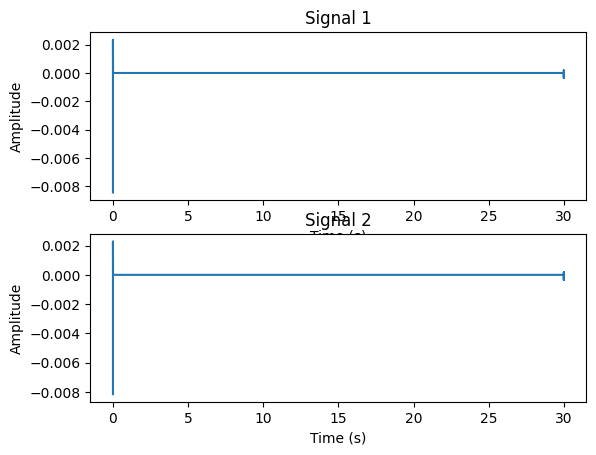

RMS Error: 3.8448418199125194e-07


In [6]:
# Compute the RMS error between the two signals
error = np.sqrt(np.mean((signal1 - signal2)**2))

# Display a plot comparing the two signals
t1 = np.arange(0, len(signal1)/Fs1, 1/Fs1)
t2 = np.arange(0, len(signal2)/Fs2, 1/Fs2)
plt.subplot(2, 1, 1)
plt.plot(t1, signal1)
plt.title('Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(t2, signal2)
plt.title('Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Print the RMS error
print('RMS Error:', error)

In [7]:
%pip install Wave


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Inverse Starts from Here

In [8]:
%pip install PyWavelets
%pip install ffmpeg-python
%pip install Wave


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



# Inverse DWT to get back the Original Audio

In [10]:
# audio_file = 'og.wav'
# signal, sr = sf.read(audio_file)
# for i in range (1,4):
#     (cA,cD)=dwt(signal,'db4')
#     low=idwt(cA,None,'db4')
#     high=idwt(None,cD,'db4')
#     fileNameLow=f'low{i}.wav'
#     fileNameHigh=f'high{i}.wav'
#     sf.write(fileNameLow,low,sr)
#     sf.write(fileNameHigh,high,sr)
#     signal,sr=sf.read(fileNameLow)

low_file='decompressed_low.wav'
signal_low, sr = sf.read(low_file)
for i in range (1,4):
    high_file=f'high{4-i}_i.wav'
    print(high_file)
    signal_high,sr_high=sf.read(high_file)
    (cA_low,cD_low)=dwt(signal_low,'db4')
    (cA_high,cD_high)=dwt(signal_high,'db4')
    # cD = np.zeros_like(cD_low)
    # cD[:len(cD_high)] = cD_high
    print(len(cA_high))
    print(len(cA_low))
    # Perform IDWT
    signal_low = idwt(cA_low, cD_high, 'db4')
    # signal_low=idwt(cA_low,cD_high,'db4')
sf.write('karan.wav',signal_low)

high3_i.wav
661507
330755


ValueError: Coefficients arrays must have the same size.